# ЛАБОРАТОРНА РОБОТА 8
Розробка нейронної мережі з використанням бібліотеки KERAS
## ЗАВДАННЯ 1.
Побудувати звичайну багатошарову нейронну мережу для датасету fashion
mnist
1. Завантажити датасет
2. Роздрукувати 10 зображень.
3. Підготовувати дані, побудувати архітектуру.
4. Використати ранню зупинку і зменшення швидкості для запобіганню
перенавчанню.
5. Вивести архітектуру моделі.
6. Зберегти модель на гугл диск.
7. Побудувати графіки функції втрат і точності для тренувальних і
тестових даних
8. Вивести класифікаційний звіт.
9. Результати розпізнавання із прогнозованим і справжнім класом

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

In [2]:
# 1. Завантажити датасет Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Імена класів
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


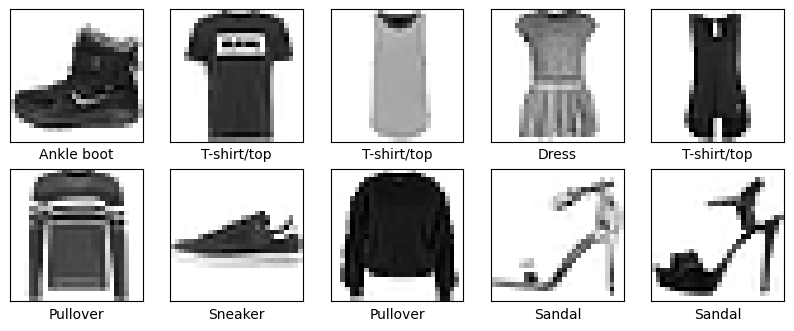

In [7]:
# 2. Роздрукувати 10 зображень
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [9]:
# 3. Підготовка даних (нормалізація)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Побудова архітектури моделі
model = models.Sequential([
    layers.Input(shape=(28, 28)),  # Використання Input шару для визначення форми вхідних даних
    layers.Flatten(),  # Розгортання зображень у вектор
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Вихідний шар для 10 класів
])

In [10]:
# Компіляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 4. Виведення архітектури моделі
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 5. Використання ранньої зупинки та зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

# Навчання моделі
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])

# Збереження моделі
model.save('fashion_mnist.h5')

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6324 - loss: 0.9700 - val_accuracy: 0.8016 - val_loss: 0.5429 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8145 - loss: 0.4989 - val_accuracy: 0.8292 - val_loss: 0.4686 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8401 - loss: 0.4281 - val_accuracy: 0.8425 - val_loss: 0.4315 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8573 - loss: 0.3853 - val_accuracy: 0.8577 - val_loss: 0.3894 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8694 - loss: 0.3586 - val_accuracy: 0.8500 - val_loss: 0.4085 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8759 - loss: 0.3389 - val_accuracy: 0.8686 - val_loss: 0.3563 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8796 - l

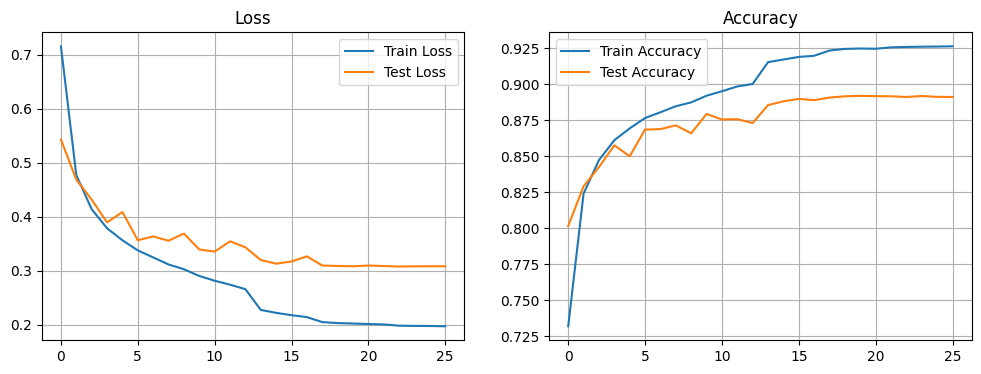

In [15]:
# 6. Побудова графіків функції втрат і точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()


313/313 - 0s - 922us/step - accuracy: 0.8912 - loss: 0.3076
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.81      0.81      1000
       Dress       0.88      0.91      0.89      1000
        Coat       0.80      0.83      0.81      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.74      0.70      0.72      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



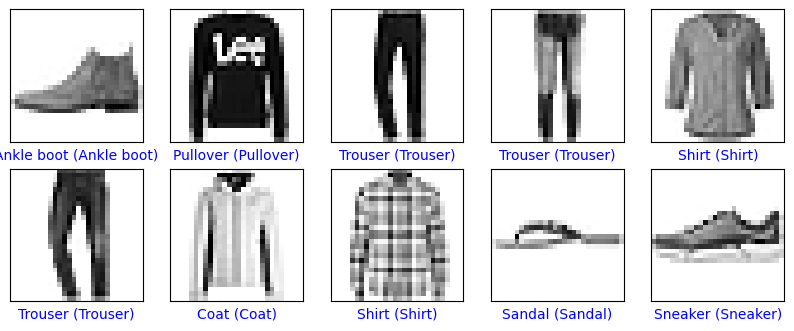

In [16]:
# 9. Виведення класифікаційного звіту
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

# Перетворюємо прогнози в мітки
predicted_labels = np.argmax(predictions, axis=1)

# Виведення класифікаційного звіту
print(classification_report(test_labels, predicted_labels, target_names=class_names))

# 10. Результати розпізнавання із прогнозованим і справжнім класом
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f'{class_names[predicted_label]} ({class_names[true_label]})', color=color)

## Висновок

### Порівняння процесу створення моделі класифікації з використанням KERAS та Sklearn

### Висновок
Процес створення моделі класифікації з використанням KERAS та Sklearn має багато спільного, але також є деякі відмінності. KERAS надає більше можливостей для побудови складних нейронних мереж та гнучкості в налаштуванні архітектури моделі. Sklearn, з іншого боку, є більш простим у використанні для класичних алгоритмів машинного навчання та швидкого прототипування. Обидва підходи мають свої переваги та недоліки, і вибір між ними залежить від конкретних вимог завдання.